In [1]:
from pyVHR_fix.signals.video import Video
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
import cv2
from tqdm import tqdm
change_res = 480
size = [change_res*4//3, change_res]
duration = 2
fps = 30
print('\n','Resolution: ',size,'\n')
cap = cv2.VideoCapture(0)
video_arr = []

def rescale_frame(frame):
    width = int(size[0])
    height = int(size[1])
    dim = (width, height)
    return cv2.resize(frame, dim, interpolation =cv2.INTER_AREA)

for i in tqdm(range(2100)):
# while True:
    if i>99:
        ret, frame = cap.read()
        if ret==True:
            # frame = rescale_frame(frame, percent=75)
            frame = cv2.flip(frame,0)
            frame = rescale_frame(frame)
            frame = cv2.rotate(frame, cv2.cv2.ROTATE_90_CLOCKWISE)
            video_arr.append(frame)
            cv2.imshow('img', frame)
            if cv2.waitKey(1) == ord('q'):
                break
            if len(video_arr)>2000:
                break
        else:
            break
cap.release()
cv2.destroyAllWindows()
print('\nfinish')

  9%|▉         | 102/1100 [00:00<00:01, 617.11it/s]
 Resolution:  [640, 480] 

100%|██████████| 1100/1100 [00:33<00:00, 32.91it/s]
finish



In [3]:
# cv2.imshow('img', video_arr[100])
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [4]:
import skvideo.io
# get npy array
# video = skvideo.io.vread(filename)
print(np.array(video_arr).shape)

# video = Video('test', video)

video = Video('test', video_arr)

(1872, 360, 208, 3)
(1000, 640, 480, 3)


In [5]:
video.getCroppedFaces(detector='mtcnn', extractor=None)
video.printVideoInfo()

pass


mtcnn



Performing face detection...
(1000, 640, 480, 3)

WARNING! Strange Face Crop... Skipping frame 1...

WARNING! Strange Face Crop... Skipping frame 2...

WARNING! Strange Face Crop... Skipping frame 3...

WARNING! Strange Face Crop... Skipping frame 4...

WARNING! Strange Face Crop... Skipping frame 5...

WARNING! Strange Face Crop... Skipping frame 6...

WARNING! Strange Face Crop... Skipping frame 7...
	Video now starts at 0.13333333333333333 seconds

Processing: |█████████████████████████████████████████████████-| 99.9% Complete
   * Video filename: test
         Total frames: 992
             Duration: 16.67 (sec)
           Frame rate: 60 (fps)
                Codec: raw
           Num frames: 992
               Height: 640
                Width: 640
             Detector: mtcnn
            Extractor: None


In [6]:

video.setMask(typeROI='rect', rectRegions=['forehead', 'lcheek', 'rcheek', 'nose'])
video.setMask(typeROI='skin_adapt',skinThresh_adapt=0.2)
video.setMask(typeROI='skin_fix',skinThresh_fix=[20, 50])

In [7]:
from pyVHR_fix.methods.chrom import CHROM
params = {"video": video, "verb":1, "ROImask":"skin_adapt", "skinAdapt":0.2}
m = CHROM(**params)
bpmES, timesES = m.runOffline(**params)


    * CHROM params: start time = 0.0, end time = 16.7, winsize = 5.0 (sec)


In [8]:
print(bpmES, timesES)

[[151.171875   52.734375  147.65625    50.9765625 128.3203125 123.046875
   65.0390625  63.28125    50.9765625 138.8671875 135.3515625 140.625
  142.3828125 142.3828125 100.1953125  94.921875   86.1328125]] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


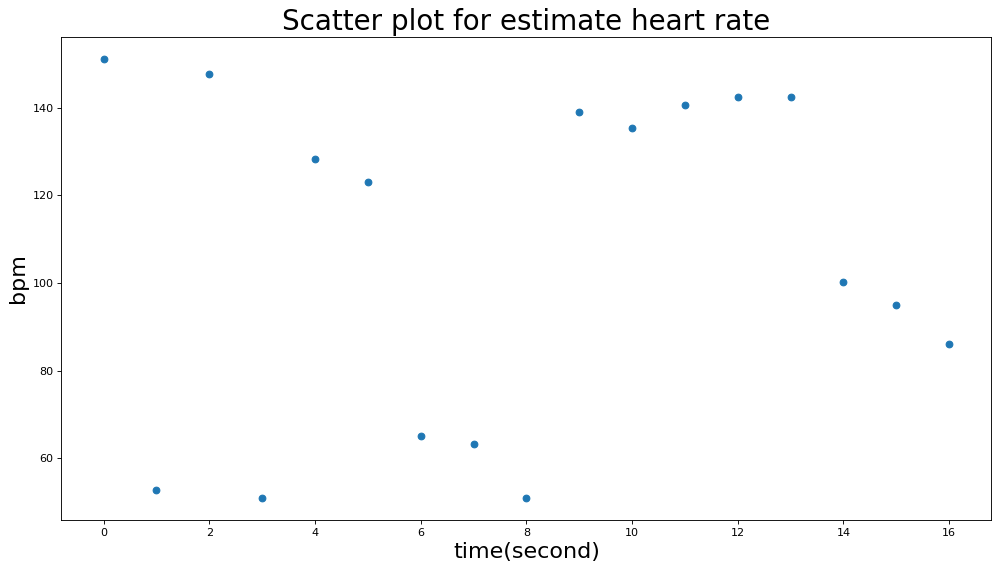

In [9]:

figure(figsize=(15,8), dpi=80)
SMALL_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 20
plt.scatter(timesES, bpmES)
plt.title('Scatter plot for estimate heart rate',fontsize=25)
plt.xlabel('time(second)',fontsize=20)
plt.ylabel('bpm',fontsize=20)
plt.show()
